<a href="https://colab.research.google.com/github/dindararas/Data-Science-Portfolio/blob/main/Recommendation%20System/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONTENT-BASED MOVIE RECOMMENDATION SYSTEM**

## **1. IMPORTING LIBRARIES**

In [ ]:
# Standard libraries
import numpy as np
import pandas as pd

# Libraries for data visualization
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as iplo
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Libraries for Recommendation System
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Useful libraries
import json
import warnings
warnings.filterwarnings('ignore')
import calendar

## **2. LOADING DATASET**

In [ ]:
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv', encoding='utf-8')
# Check the first 5 data in movies
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Check the first 5 data of credits dataset
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Dataframe shape
print(f'Movies dataset has {movies.shape[0]} rows and {movies.shape[1]} columns')
print(f'Credits dataset has {credits.shape[0]} rows and {credits.shape[1]} columns')

Movies dataset has 4803 rows and 20 columns
Credits dataset has 1962 rows and 4 columns


## **2. DATA CLEANING**

In [ ]:
# Check columns names
print(movies.columns)
print(credits.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')
Index(['id', 'title', 'cast', 'crew'], dtype='object')


In [ ]:
# Rename 'movie_id' column into 'id' in credits dataframe
credits = credits.rename(columns = {'movie_id' : 'id'})

# Merge 2 dataframes 
movies = movies.merge(credits, on = 'id')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
# Drop unnecessary columns 
movies = movies.drop(columns = ['homepage', 'title_x', 'title_y', 'spoken_languages'])

### **Converting JSON to String**

In [ ]:
# Converting columns with json format to str 
def json_to_str(df) :
  columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'cast']
  for column in columns :
    df[column] = df[column].apply(json.loads)
    for index, i in zip(df.index, df[column]) :
      l1 = []
      for j in range(len(i)) :
        l1.append((i[j]['name']))
        df.loc[index, column] = str(l1)
  return df

movies = json_to_str(movies)

In [ ]:
# Get director name
movies['crew']=movies['crew'].apply(json.loads)
def director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
movies['crew']=movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,Released,The Legend Ends,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [ ]:
# Removing unnecessary characters in columns
def remove_char(df, column = str) :
  columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'cast']
  for column in columns :
    df[column] = df[column].str.replace("'", '').str.replace('[', '').str.replace(']', '')
  return df

movies = remove_char(movies)

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director
0,237000000,"action,adventure,fantasy,sciencefiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron
1,300000000,"adventure,fantasy,action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski
2,245000000,"action,adventure,crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes
3,250000000,"action,crime,drama,thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,Released,The Legend Ends,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan
4,260000000,"action,adventure,sciencefiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton


### **Checking and Removing Duplicates**

In [ ]:
# Checking duplicates in dataset
print(f'Number of duplicated data : {movies.duplicated().sum()}')

Number of duplicated data : 0


## **3. EXPLORATORY DATA ANALYSIS**

### **Top 10 Movies Based on Weighted Average Scores and Popularity**

W = (Rv+Cm)/(v+m)

W = Weighted Rating

R = average for the movie(0 to 10)

v = number of votes for the movie

m = minimum votes required to be listed in Top 250

C = Mean vote across whole Report

In [ ]:
v = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.70)  

movies['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director,weighted_avg
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,7.148013
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,6.807627
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,6.276075
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,Released,The Legend Ends,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,7.509565
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,6.098319


In [ ]:
movies_scorepop = movies[['original_title', 'weighted_avg', 'popularity']]
movies_scorepop.set_index('original_title', inplace = True)
movies_scorepop = movies_scorepop.round(decimals = 3)
movies_score = movies_scorepop.sort_values(by = 'weighted_avg', ascending = False)
movies_pop = movies_scorepop.sort_values(by = 'popularity', ascending = False)

# Data visualization
fig = make_subplots(rows = 2, cols = 1)
# Data for top 10 movies based on popularity and score
score = {'x' : movies_score['weighted_avg'][:10].sort_values(ascending = True), 
        'y' : movies_score['weighted_avg'][:10].sort_values(ascending = True).index}

pop = {'x' : movies_pop['popularity'][:10].sort_values(ascending = True), 
        'y' : movies_pop['popularity'][:10].sort_values(ascending = True).index}

fig.add_trace(go.Bar(score, name = 'Top 10 Movies by Score', orientation = 'h', text=score['x']), row =1, col =1)
fig.add_trace(go.Bar(pop, name = 'Top 10 Movies by Popularity', orientation = 'h', text = pop['x']), row =2, col =1)

# Settings
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text = 'Top 10 Movies Based on Score and Popularity', plot_bgcolor = 'white')

fig.show()

It can be seen that there is difference between top 10 movies by score and popularity. While top 10 movies by score has the score of around 8, there is large gap among movies by popularity. **Minions** gained **popularity score of 875.581**, while other movies are below 800. 

### **Top 10 Most Expensive Movies**

In [ ]:
movies_budg = movies[['original_title', 'budget']]
movies_budg.set_index('original_title', inplace = True)
movies_budg = movies_budg.sort_values(by = 'budget', ascending = False)

# Data visualization
# Data for top 10 movies based on popularity and score
budget = {'x' : movies_budg['budget'][:10].sort_values(ascending = True), 
        'y' : movies_budg['budget'][:10].sort_values(ascending = True).index}

fig = go.Figure(go.Bar(budget, orientation = 'h', text=budget['x']))

# Settings
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text = 'Top 10 Most Expensive Movies', plot_bgcolor = 'white')

fig.show()

Two Pirates of Carribean production movies spent the highest budget, which are around $300M. Top 10 most expensive movies are mainly Hollywood movies. 

### **Distribution of Movies by Released Date**

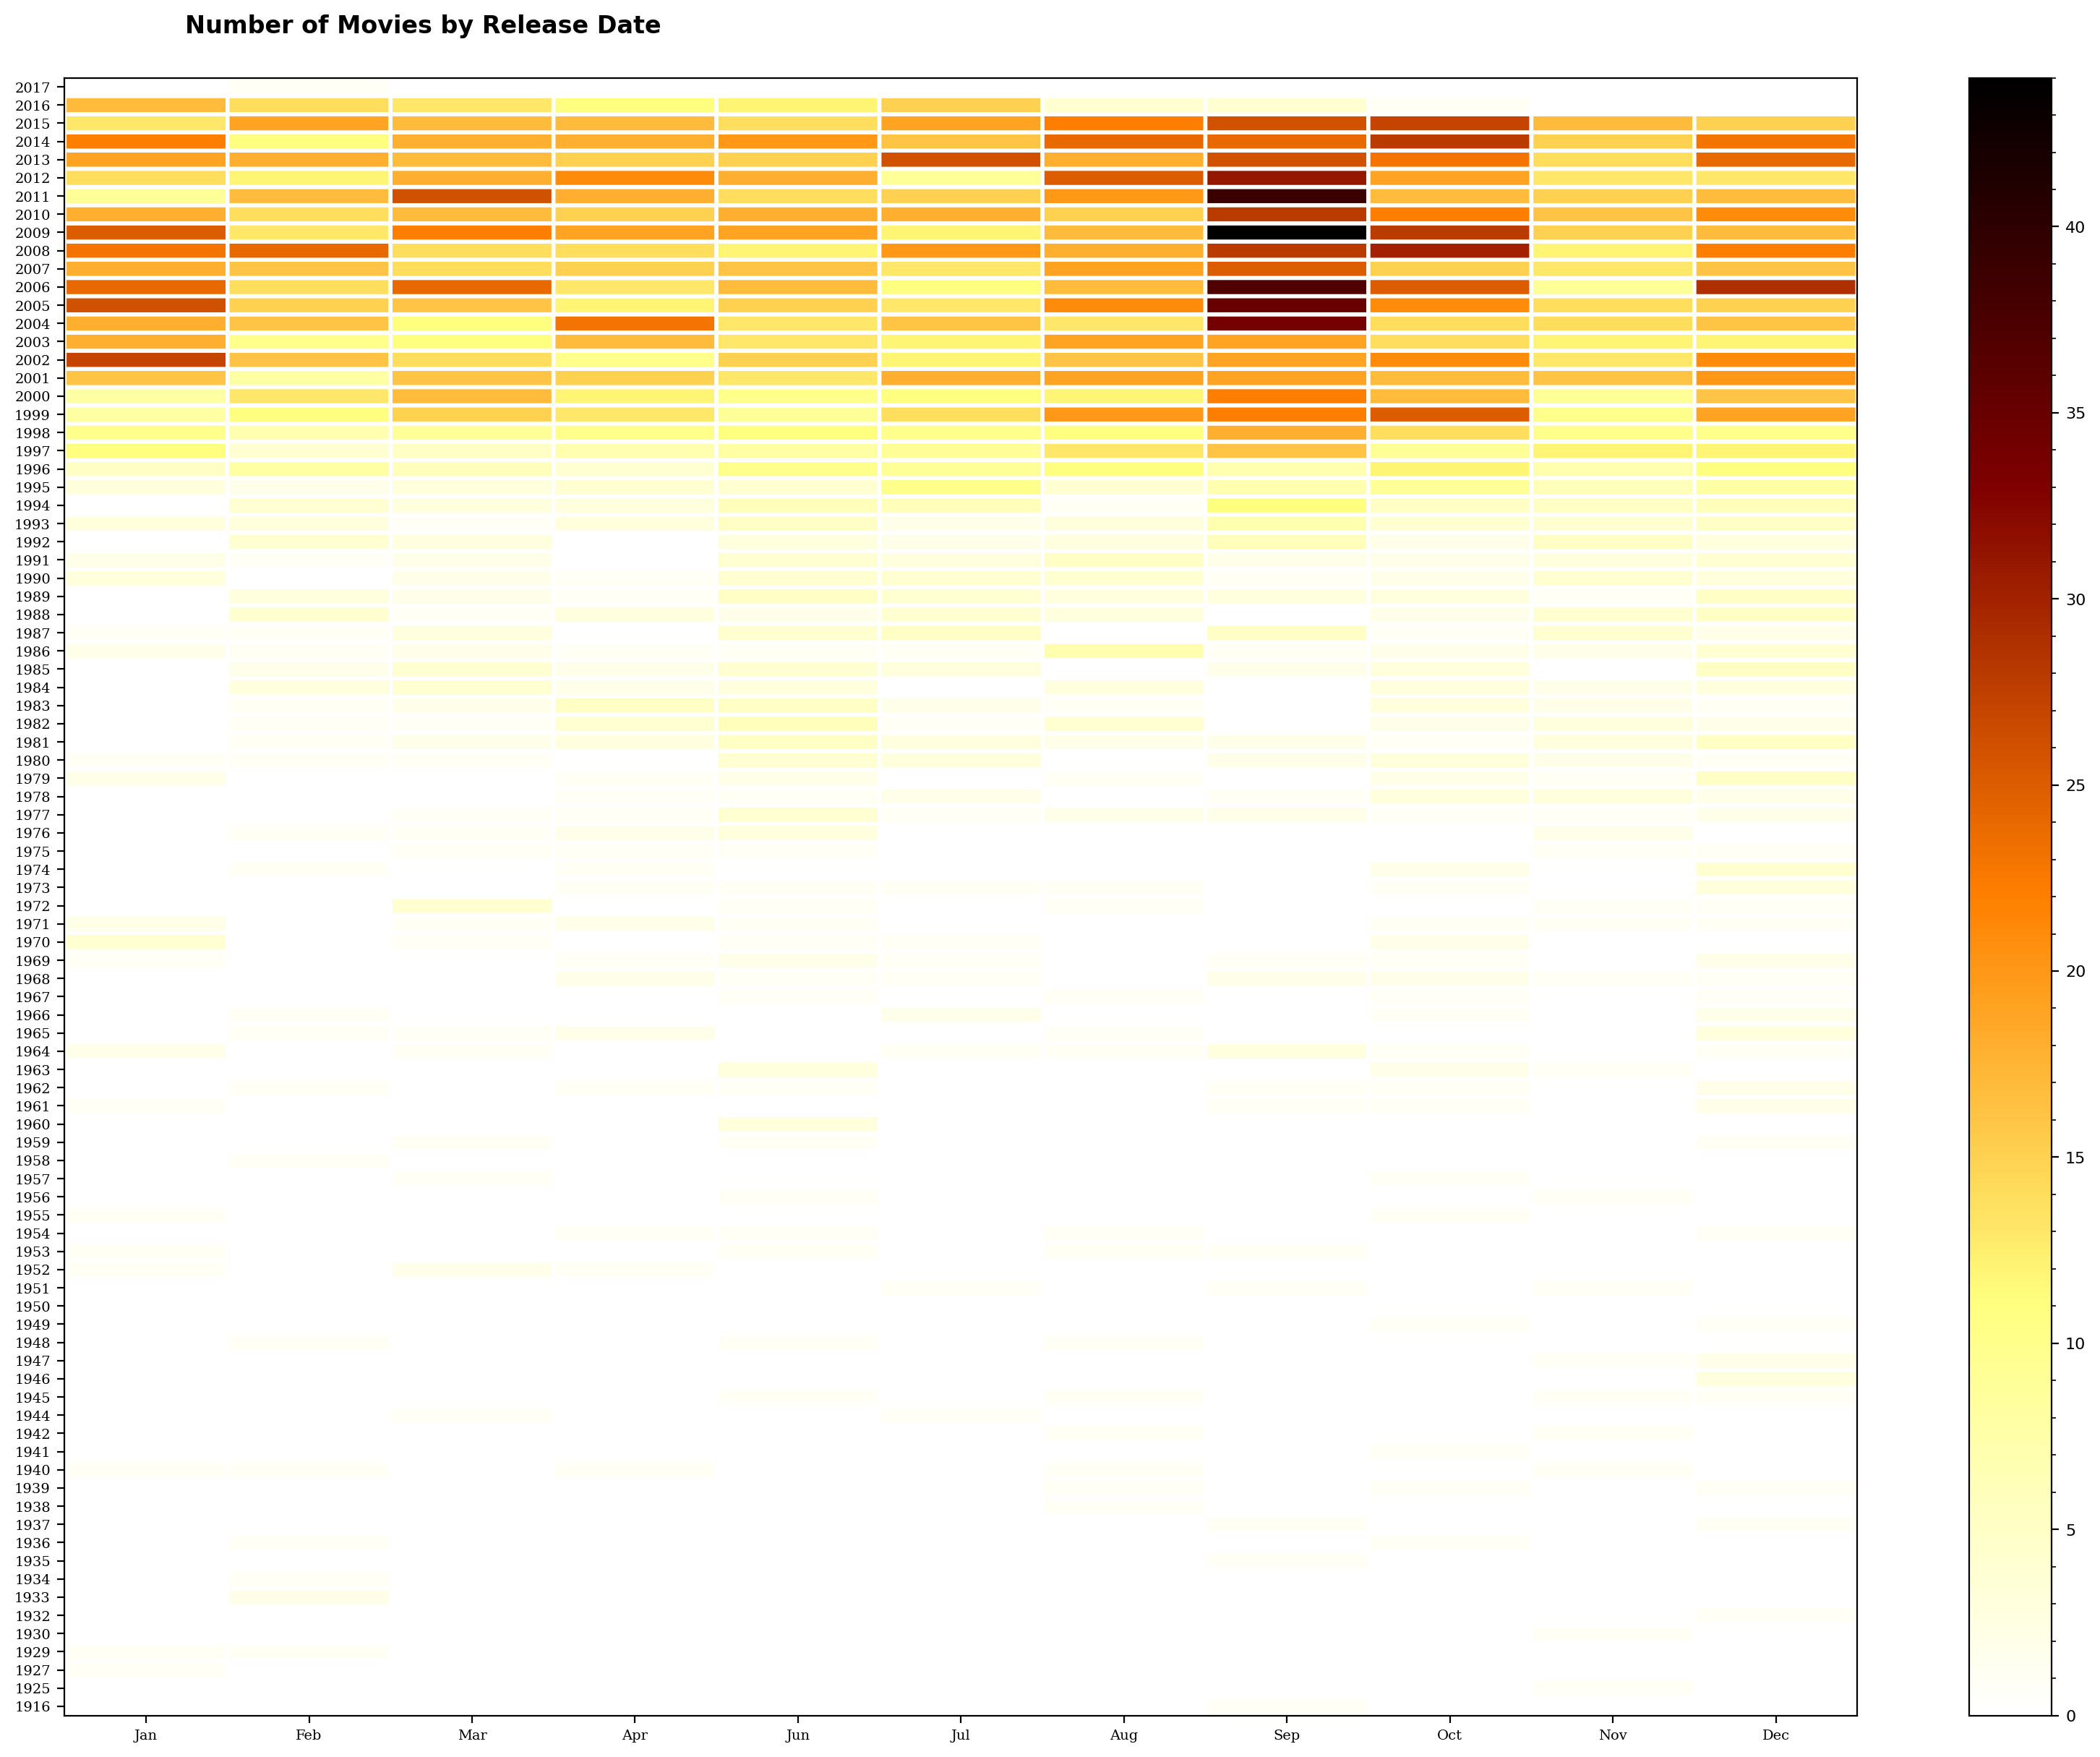

In [ ]:
# Convert to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], format = '%Y-%m-%d')
movies_date = movies[['release_date']].dropna()

# Get year and month from date
movies_date['year'], movies_date['month'] = movies_date['release_date'].dt.year, movies_date['release_date'].dt.month

# Get month name using calendar library
movies_date['month'] = movies_date['month'].apply(lambda x: calendar.month_abbr[x])

movies_date = movies_date.groupby('year')['month'].value_counts().unstack().fillna(0)
movies_date = movies_date[['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

plt.figure(figsize=(20,15), dpi=200)
plt.pcolor(movies_date, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(movies_date.columns), 1), movies_date.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(movies_date.index), 1), movies_date.index, fontsize=7, fontfamily='serif')

plt.title('Number of Movies by Release Date', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [ ]:
# Yearwise Analysis
# Make a new dataframe
movies_year = movies[['release_date']].dropna()
movies_year['year'] = movies_year['release_date'].dt.year
year = movies_year.year.value_counts().to_frame()
year =year.groupby((year.index//10)*10).sum()
year.reset_index(inplace = True)
year.columns = ['Year', 'Count']


# Visualization
# Visualization
fig = px.pie(year, values='Count', names='Year')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text = 'Number of Movies in Each Decade', plot_bgcolor = 'white')
fig.show()

From the figures above, we can see that many movies were released in September and October during the period of 2004-2015. Furthermore, most of movies in this dataset were released in 2000s. Movie industry started to grow in 1990s and the number of released movied increased drastically from 2000s. Before 2000s, the number of released movies was below 15 movies/month. 

### **Distribution of Movies by Original Language**

In [ ]:
# Make a new dataframe
lang = movies.original_language.value_counts().to_frame()
lang.reset_index(inplace = True)
lang.columns = ['Language', 'Count']

# Visualization
fig = px.pie(lang, values='Count', names='Language')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text = 'Language Used in Movies', plot_bgcolor = 'white')
fig.show()

Movies in this dataset are dominated by english-speaking movies which account for **93.8%** followed by France (**1.46%**)

### **WordCloud for Genre**



In [ ]:
mov = movies.copy()
mov.dropna(subset = ['genres'], inplace = True)

def wordcloud(df, column = str) :
  words=list(mov[column])
  word=[]

  for i in words:
    i=list(i.split(','))
    for j in i:
      word.append(j.replace(' ',""))

  text = list(set(word))
  plt.rcParams['figure.figsize'] = (10, 10)

  wordcloud = WordCloud(max_words=100,background_color='white').generate(str(text))

  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

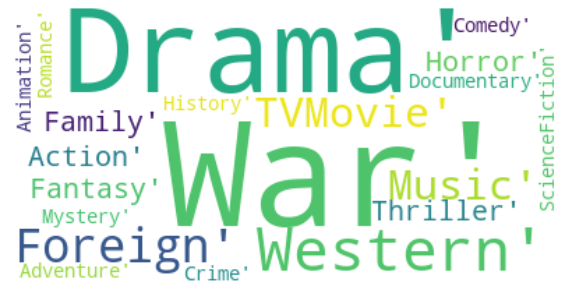

In [ ]:
wordcloud(mov, 'genres')

### **Distribution of Duration**

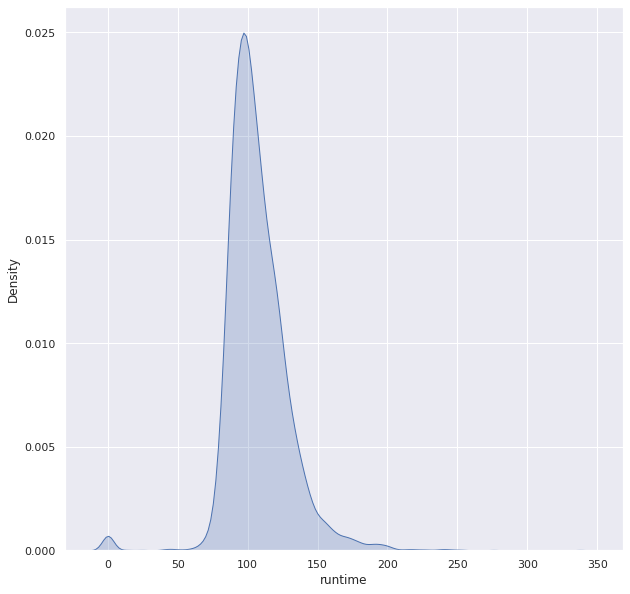

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=movies['runtime'], shade=True)

Duration of many movies are around 100 minutes.

## **4. CONTENT-BASED RECOMMENDATION SYSTEM**

### **Recommendation System by Description**

In [ ]:
# Defining a TF-IDF Vectorizer and removing all stop words
tfidf =  TfidfVectorizer(stop_words = 'english') 

# Replacing NaN with empty string
movies['overview'] = movies['overview'].fillna('')

tfidf_mat = tfidf.fit_transform(movies['overview'])

# Calculating the cosine similarity
cosine_sim = linear_kernel(tfidf_mat, tfidf_mat)

indices = pd.Series(movies.index, index =movies['original_title']).drop_duplicates()

In [ ]:
def recommendation(title, cosine_sim = cosine_sim) :
  idx = indices[title]
  score = list(enumerate(cosine_sim[idx]))

  # sorting the movies based on the similarity score
  score = sorted(score, key = lambda x :x[1], reverse = True)
  
  # Get 10 similar movies
  best_score = score[1:11]

  movie_idx = [i[0] for i in best_score]
  return movies['original_title'].iloc[movie_idx]

In [ ]:
recommendation('The Hobbit: The Desolation of Smaug')

98                      The Hobbit: An Unexpected Journey
19              The Hobbit: The Battle of the Five Armies
262     The Lord of the Rings: The Fellowship of the Ring
329         The Lord of the Rings: The Return of the King
160                            How to Train Your Dragon 2
1306                          Dragon Nest: Warriors' Dawn
4612                                              Old Joy
1524                                George and the Dragon
2207                                            12 Rounds
292                                                Eragon
Name: original_title, dtype: object

In [ ]:
recommendation('Fight Club')

3619                      UHF
2828                Project X
2585          The Hurt Locker
2344              Raging Bull
2023               The Animal
1414      Blast from the Past
4044               Go for It!
3515             Freaky Deaky
4045    Dancer, Texas Pop. 81
4760    This Is Martin Bonner
Name: original_title, dtype: object

### **Recommendation System by Genre, Director, Cast, and Keywords**

In [ ]:
# Filling null values with empty strings
filledna = movies.fillna('')


# Convert all string to lower case and strip names of spaces
def clean_data(x):
  return str.lower(x.replace(" ", ""))

features = ['genres', 'keywords', 'director', 'cast']

for feature in features :
  filledna[feature] = filledna[feature].apply(clean_data)

In [ ]:
def create_soup(x):
  return x['genres']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['keywords']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [ ]:
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(filledna['soup'])

# Calculate cosine similarity
cosine_sim2 = cosine_similarity(count_matrix)


In [ ]:
recommendation('The Hobbit: The Desolation of Smaug', cosine_sim2)

19              The Hobbit: The Battle of the Five Armies
98                      The Hobbit: An Unexpected Journey
262     The Lord of the Rings: The Fellowship of the Ring
330                 The Lord of the Rings: The Two Towers
329         The Lord of the Rings: The Return of the King
3631                                   Heavenly Creatures
107                                              Warcraft
2655          Dungeons & Dragons: Wrath of the Dragon God
1977                                              The Wiz
3775                                           Mirrormask
Name: original_title, dtype: object

In [ ]:
recommendation('Fight Club', cosine_sim2)

1553                       Se7en
946                     The Game
421                       Zodiac
4564    Straight Out of Brooklyn
45                   World War Z
4462          The Young Unknowns
3863                      August
3043            End of the Spear
1010                  Panic Room
4101                Full Frontal
Name: original_title, dtype: object

In [ ]:
recommendation('Inception', cosine_sim2)

4401                      The Helix... Loaded
1932                                   Sheena
607     Sky Captain and the World of Tomorrow
1447                                Knock Off
1001    Street Fighter: The Legend of Chun-Li
4589                                   Fabled
1273                              Extreme Ops
1715                                  Timecop
4734                                 Echo Dr.
495          Journey 2: The Mysterious Island
Name: original_title, dtype: object